In [20]:
# --------------------------------------------
# Create virtual display (Google Colab)
# --------------------------------------------
!pip install svgling
!apt-get install -y xvfb ghostscript python3-tk # Install X Virtual Frame Buffer and other dependencies
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.
%matplotlib inline


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ghostscript is already the newest version (9.55.0~dfsg1-0ubuntu5.12).
python3-tk is already the newest version (3.10.8-1~22.04).
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.15).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [12]:
# -----------------------------
# Q1: Preprocessing and Exploratory Data Analysis
# -----------------------------
# Shu Hui
print("Q1: Preprocessing and Exploratory Data Analysis - Shu Hui")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from pathlib import Path
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter

# Download required resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

Q1: Preprocessing and Exploratory Data Analysis - Shu Hui


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [4]:
# -----------------------------
# Import Repo from github
# -----------------------------
!git clone https://github.com/MiyokoPang/TXSA.git

Cloning into 'TXSA'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 79 (delta 41), reused 37 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (79/79), 502.90 KiB | 4.53 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [13]:
# Load dataset
print("Loading dataset")
with open("TXSA/sentiment_tweets3.csv") as file:
    df = pd.read_csv(file)
df.columns = ['Index', 'message', 'label']

# Step 1: Clean raw text
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.lower()

print("Cleaning text...")
df['clean_message'] = df['message'].astype(str).apply(clean_text)

# Step 2: Stopwords removal and stemming
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered)

print("Preprocessing text (stopword removal + stemming)")
df['processed_message'] = df['clean_message'].apply(preprocess_text)


Loading dataset
Cleaning text...
Preprocessing text (stopword removal + stemming)



Q1.1: Class Distribution
0 (Not Depressed): 8000 tweets
1 (Depressed): 2314 tweets


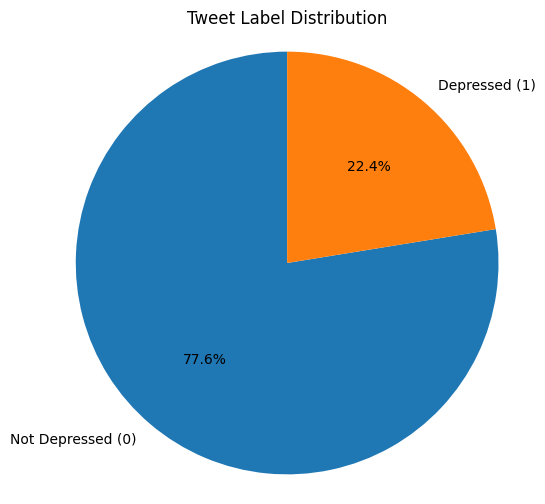

In [14]:
# 1. Class Distribution
print("\nQ1.1: Class Distribution")
label_counts = df['label'].value_counts()
for label, count in label_counts.items():
    label_name = "Not Depressed" if label == 0 else "Depressed"
    print(f"{label} ({label_name}): {count} tweets")

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(label_counts, labels=['Not Depressed (0)', 'Depressed (1)'], autopct='%1.1f%%', startangle=90)
plt.title("Tweet Label Distribution")
plt.axis('equal')
plt.show()


Q1.2: Average Tweet Length by Label
Not Depressed (0): 73.56 characters
Depressed (1): 158.50 characters


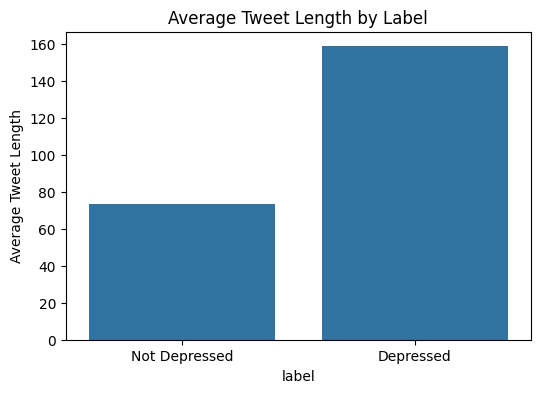

In [15]:
# 2. Average Tweet Length
print("\nQ1.2: Average Tweet Length by Label")
df['tweet_length'] = df['message'].astype(str).apply(len)
avg_lengths = df.groupby('label')['tweet_length'].mean()
print(f"Not Depressed (0): {avg_lengths[0]:.2f} characters")
print(f"Depressed (1): {avg_lengths[1]:.2f} characters")

# Bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=avg_lengths.index, y=avg_lengths.values)
plt.xticks([0, 1], ['Not Depressed', 'Depressed'])
plt.ylabel("Average Tweet Length")
plt.title("Average Tweet Length by Label")
plt.show()


Q1.3: Top 20 Most Frequent Words
depress: 2337
im: 1039
go: 741
good: 698
love: 696
day: 674
get: 659
like: 598
thank: 559
time: 460
know: 443
â: 421
dont: 408
lol: 406
one: 384
got: 365
today: 364
anxieti: 361
see: 358
u: 357


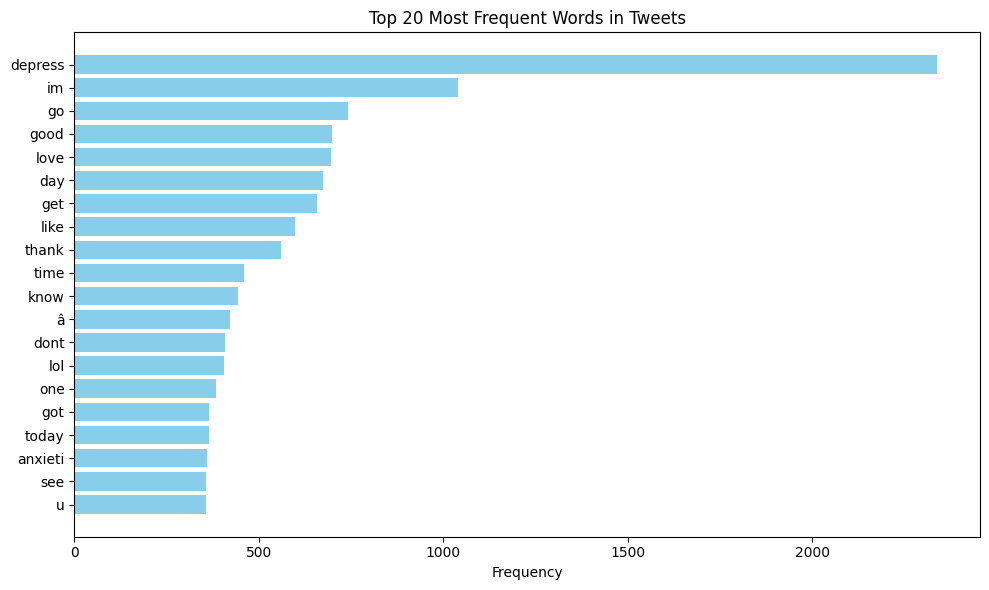

-------------------


In [16]:
# 3. Top 20 Frequent Words
print("\nQ1.3: Top 20 Most Frequent Words")
all_words = ' '.join(df['processed_message']).split()
common_words = Counter(all_words).most_common(20)

for word, count in common_words:
    print(f"{word}: {count}")

# Plot
words = [word for word, count in common_words]
counts = [count for word, count in common_words]

plt.figure(figsize=(10, 6))
plt.barh(words[::-1], counts[::-1], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Words in Tweets')
plt.tight_layout()
plt.show()

print("-------------------")

In [17]:
# -----------------------------
# Individual Section: Q2: Supervised Text Classification Model + Q3: Hyper Parameter Selection
# -----------------------------

print("Individual Sections: Q2: Supervised Text Classification Model + Q3: Hyper Parameter Selection")

Individual Sections: Q2: Supervised Text Classification Model + Q3: Hyper Parameter Selection


In [18]:
# Miyoko Pang: Logistic Regression
print("Miyoko Pang (TP067553)")
print("\nQ2: Supervised Text Classification Model: Logistic Regression")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = df['processed_message']
y = df['label']

# Train-test split
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
end_time = time.time()
print(f"Data split. Time taken: {(end_time - start_time) * 1000000:.2f} µs")

# TF-IDF vectorization
start_time = time.time()
vectorizer = TfidfVectorizer( max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
end_time = time.time()
print(f"TF-IDF vectorization complete. Time taken: {(end_time - start_time) * 1000000:.2f} µs")

# Train logistic regression
start_time = time.time()
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)
end_time = time.time()
print(f"Model trained. Time taken: {(end_time - start_time) * 1000000:.2f} µs")

# Predict
start_time = time.time()
y_pred = model.predict(X_test_vec)
end_time = time.time()
print(f"Prediction complete. Time taken: {(end_time - start_time) * 1000000:.2f} µs")

# Results
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Miyoko Pang (TP067553)

Q2: Supervised Text Classification Model: Logistic Regression
Data split. Time taken: 10111.09 µs
TF-IDF vectorization complete. Time taken: 135089.64 µs
Model trained. Time taken: 68284.75 µs
Prediction complete. Time taken: 655.17 µs

Confusion Matrix:
[[1600    0]
 [  33  430]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1600
           1       1.00      0.93      0.96       463

    accuracy                           0.98      2063
   macro avg       0.99      0.96      0.98      2063
weighted avg       0.98      0.98      0.98      2063



In [19]:
print("\nQ3: Hyper Parameter Selection - Logistic Regression")

from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200]
}

start_time = time.time()
grid = GridSearchCV(LogisticRegression(), params, cv=5, scoring='f1', verbose=1)
grid.fit(X_train_vec, y_train)
end_time = time.time()

print("Best Params:", grid.best_params_)
print(f"Grid Search Time: {(end_time - start_time) * 1000:.2f} ms")

print("-------------------")


Q3: Hyper Parameter Selection - Logistic Regression
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Params: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Grid Search Time: 2579.60 ms
-------------------


In [ ]:
# Shu Hui: KNN
print("Shu Hui")
print("\nQ2: Supervised Text Classification Model: KNN")

In [ ]:
print("\nQ3: Hyper Parameter Selection - KNN")

print("-------------------")

In [ ]:
# Yi Jing
print("Yi Jing")
print("\nQ2: Supervised Text Classification Model: ?")

In [ ]:
print("\nQ3: Hyper Parameter Selection - ?")